In [1]:
import numpy as np
import pandas as pd
data = pd.DataFrame({"marks":[34,95,64,88,99,51], "salary":[3400, 2900,
4250, 5000, 5100, 5600]})

In [2]:
#Transforming the datat to the correct shape.
X = data[['marks']].values
y = data['salary'].values

In [3]:
print ( X.shape, y.shape )

(6, 1) (6,)


In [4]:
#importing linear regression and fitting the data
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [5]:
# prediction
reg.predict([[70]])

array([4370.77778313])

In [6]:
# prediction for multiple arrays of data
reg.predict([[100],[50],[80]])

array([4439.86860471, 4324.7172354 , 4393.80805699])

In [7]:
# Checking the values of coefficient and interception
print (reg.coef_)
print (reg.intercept_)

[2.30302739]
4209.56586610194


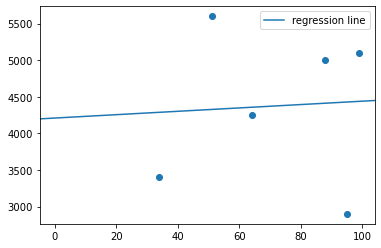

In [9]:
# visualization of what has been learned
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.scatter(X, y)
ax.axline((0, reg.intercept_), slope=reg.coef_ , label='regression line')
ax.legend()
plt.show()

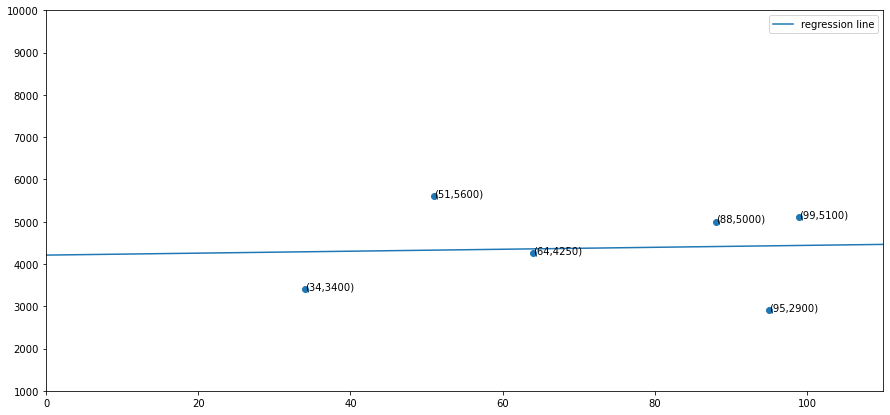

In [14]:
# printing the value of each point in the graph
import matplotlib.pyplot as plt
import random
fig,ax = plt.subplots()
fig.set_size_inches(15,7)
plt.scatter(X, y)
ax.axline((0, reg.intercept_), slope=reg.coef_ , label='regression line')
ax.legend()
ax.set_xlim(0,110)
ax.set_ylim(1000,10000)
for point in zip(X, y):
    ax.text(point[0][0], point[1]+5, "("+str(point[0]
    [0])+","+str(point[1])+")")
plt.show()

In [16]:
# Evaluation of Linear Regression
results_table = pd.DataFrame(data=X, columns=['Marks'])
results_table['Predicted Salary'] = reg.predict(X)
results_table['Actual Salary'] = y
results_table['Error'] = results_table['Actual Salary']-results_table['Predicted Salary']
results_table['Error Squared'] = results_table['Error']* results_table['Error']

In [17]:
results_table

,Marks,Predicted Salary,Actual Salary,Error,Error Squared
0,34,4287.868797,3400,-887.868797,7.883110e+05
1,95,4428.353468,2900,-1528.353468,2.335864e+06
2,64,4356.959619,4250,-106.959619,1.144036e+04
3,88,4412.232276,5000,587.767724,3.454709e+05
4,99,4437.565577,5100,662.434423,4.388194e+05
5,51,4327.020263,5600,1272.979737,1.620477e+06


In [20]:
# computing mean absolute error | mean squared error | root mean squared error
import math
import numpy as np
mean_absolute_error = np.abs(results_table['Error']).mean()
mean_squared_error = results_table['Error Squared'].mean()
root_mean_squared_error = math.sqrt(mean_squared_error)
print (mean_absolute_error)
print (mean_squared_error)
print (root_mean_squared_error)

841.0606279379443
923397.226099373
960.9355993506396


In [24]:
# Using internal implementation of sklearn to achieve the same as above
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(results_table['Actual Salary'], results_table['Predicted Salary']))
print(math.sqrt(mean_squared_error(results_table['Actual Salary'], results_table['Predicted Salary'])))
print(mean_absolute_error(results_table['Actual Salary'], results_table['Predicted Salary']))

923397.226099373
960.9355993506396
841.0606279379443
